In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer, LSTM
from tensorflow.keras.optimizers import  Adam, SGD
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import export_graphviz
#Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import pickle

from sklearn.tree import DecisionTreeClassifier


2023-12-28 19:42:01.932504: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-28 19:42:01.993647: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-28 19:42:02.009518: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-28 19:42:02.469225: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvi

In [2]:
df = pd.read_csv('train.csv')
df 

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [3]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [4]:
#Revisar valores nulos
df_nulls = df.isnull().sum()
df_nulls

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [5]:
# Eliminar filas con valores faltantes
df = df.dropna()
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [6]:
# Eliminar las columnas 'Artist Name' y 'Track Name'
df = df.drop(['Track Name', 'Artist Name'], axis=1)
df

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [7]:
#obtiene la frecuencia de cada genero y su media
frecuencia_genero = df['Class'].value_counts()

#imprime los resultados
print(frecuencia_genero)

Class
10    3374
6     2039
8     1523
9     1099
1     1037
2      956
5      517
7      464
0      386
3      270
4      148
Name: count, dtype: int64


In [8]:
conteo_generos = df['Class'].value_counts()

# Filtrar solo los géneros con 1000 o más entradas
generos_mayor_100 = conteo_generos[conteo_generos >= 100]

# Obtener el número mínimo de entradas entre los géneros seleccionados
min_entradas = generos_mayor_100.min()

# Filtrar el DataFrame original para incluir solo los géneros seleccionados
df_filtrado = df[df['Class'].isin(generos_mayor_100.index)]

# Ajustar la cantidad de entradas para que todos los géneros tengan la misma cantidad
df = df_filtrado.groupby('Class').apply(lambda x: x.sample(min_entradas)).reset_index(drop=True)

# Verificar el nuevo conteo de entradas por género
print(df['Class'].value_counts())

Class
0     148
1     148
2     148
3     148
4     148
5     148
6     148
7     148
8     148
9     148
10    148
Name: count, dtype: int64


In [9]:
# Estandarización de los datos
le = LabelEncoder()
valores_numericos = df.columns.drop(['key', 'mode', 'time_signature', 'Class'])

scaler = StandardScaler()

df[valores_numericos] = scaler.fit_transform(df[valores_numericos])

df.head()





,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0.603241,0.243390,-1.130063,2.0,0.570817,1,-0.529701,1.353098,-0.572531,-0.254281,-1.206613,-0.772886,-1.110202,3,0
1,-0.211374,-0.230881,-0.583320,11.0,0.091017,1,-0.385501,-0.024545,2.088253,-0.554269,-0.273046,1.717416,-1.110196,4,0
2,0.661427,0.622806,-0.684138,2.0,-0.238407,1,-0.566101,0.441137,-0.563968,-0.456447,-0.156350,-0.276378,-1.110197,4,0
3,-1.956976,0.195963,-1.110675,2.0,-1.001425,0,-0.566101,1.070362,-0.376107,-0.384711,-0.019535,0.362878,-1.110193,4,0
4,-0.444121,0.759159,-1.393741,3.0,-0.952743,1,-0.556301,1.549904,-0.572455,-0.449926,-0.900789,0.368418,-1.110199,4,0


In [10]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

encoded_columns = encoder.fit_transform(df[['key', 'mode', 'time_signature']])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['key', 'mode', 'time_signature']))

df = df.drop(['key', 'mode', 'time_signature'], axis=1)
df = pd.concat([df, encoded_df], axis=1)
encoded_df

,key_1.0,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,mode_0,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1626,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Random Forest

In [11]:
# Separar target y features
X = df.drop(['Class'], axis=1)
y = df['Class']

In [12]:
X

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_8.0,key_9.0,key_10.0,key_11.0,mode_0,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,0.603241,0.243390,-1.130063,0.570817,-0.529701,1.353098,-0.572531,-0.254281,-1.206613,-0.772886,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.211374,-0.230881,-0.583320,0.091017,-0.385501,-0.024545,2.088253,-0.554269,-0.273046,1.717416,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.661427,0.622806,-0.684138,-0.238407,-0.566101,0.441137,-0.563968,-0.456447,-0.156350,-0.276378,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.956976,0.195963,-1.110675,-1.001425,-0.566101,1.070362,-0.376107,-0.384711,-0.019535,0.362878,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.444121,0.759159,-1.393741,-0.952743,-0.556301,1.549904,-0.572455,-0.449926,-0.900789,0.368418,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1.243295,-0.118241,1.200381,0.536575,-0.224501,-0.996406,-0.572405,-0.312975,1.606159,1.095157,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1624,0.428680,0.439026,1.115074,0.072658,-0.367301,-0.938168,1.918142,0.306566,0.901960,0.341298,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1625,1.243295,-1.268347,0.521799,0.744089,0.636500,-1.010768,1.375713,-0.725784,-0.248902,2.158247,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1626,-0.735054,-1.712975,-0.726792,-1.764855,-0.141901,-0.975035,0.560465,-0.404275,-1.786470,1.012223,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [13]:
# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1302)


In [14]:
rf_model = RandomForestClassifier(n_estimators=256, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [15]:
#score
rf_model.score(X_test, y_test)

0.5306748466257669

In [16]:
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train, y_train)
y_pred = dtc_model.predict(X_test)

In [17]:
dtc_model.score(X_test, y_test)

0.401840490797546

In [18]:
#modelo svm
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [19]:
#score
svm_model.score(X_test, y_test)

0.5061349693251533

In [20]:
#svm kernel lineal
svm_model_lineal = SVC(kernel='linear', random_state=42)
svm_model_lineal.fit(X_train, y_train)
y_pred = svm_model_lineal.predict(X_test)

In [21]:
#score svm lineal
svm_model_lineal.score(X_test, y_test)

0.4662576687116564

In [22]:
#svm kernel polinomial
svm_model_polinomial = SVC(kernel='poly', random_state=42)
svm_model_polinomial.fit(X_train, y_train)
y_pred = svm_model_polinomial.predict(X_test)

In [23]:
#score
svm_model_polinomial.score(X_test, y_test)

0.5122699386503068

In [37]:
X_train_t = scaler.fit_transform(X_train)
X_test_t = scaler.transform(X_test)
y_train_t = to_categorical(y_train)
y_test_t = to_categorical(y_test)

In [38]:
num_epochs = 10
learning_rate = 5e-3

In [39]:
model_block = Sequential()
model_block.add(InputLayer(input_shape=(X_train_t.shape[1],)))
model_block.add(Dense(256, activation='relu'))
model_block.add(Dropout(0.5))
model_block.add(Dense(128, activation='relu'))
model_block.add(Dropout(0.3))
model_block.add(Dense(32, activation='relu'))
model_block.add(Dropout(0.2))

model_block.add(Dense(y_train_t.shape[1], activation='softmax'))
model_block.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
model_block.summary()
model_fit = model_block.fit(X_train_t, y_train_t, epochs=num_epochs, validation_data=(X_test_t, y_test_t), batch_size=32)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               7424      
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 32)                4128      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 11)               

41/41 [==============================] - 0s 2ms/step - loss: 2.0893 - accuracy: 0.2435 - val_loss: 1.6770 - val_accuracy: 0.4049
Epoch 2/10
41/41 [==============================] - 0s 1ms/step - loss: 1.6229 - accuracy: 0.4224 - val_loss: 1.5042 - val_accuracy: 0.4264
Epoch 3/10
41/41 [==============================] - 0s 966us/step - loss: 1.4713 - accuracy: 0.4608 - val_loss: 1.4705 - val_accuracy: 0.4663
Epoch 4/10
41/41 [==============================] - 0s 972us/step - loss: 1.3806 - accuracy: 0.4962 - val_loss: 1.4345 - val_accuracy: 0.4693
Epoch 5/10
41/41 [==============================] - 0s 960us/step - loss: 1.3189 - accuracy: 0.5138 - val_loss: 1.4243 - val_accuracy: 0.4755
Epoch 6/10
41/41 [==============================] - 0s 996us/step - loss: 1.3402 - accuracy: 0.5046 - val_loss: 1.4019 - val_accuracy: 0.4693
Epoch 7/10
41/41 [==============================] - 0s 976us/step - loss: 1.3343 - accuracy: 0.4923 - val_loss: 1.4824 - val_accuracy: 0.4724
Epoch 8/10
41/41 [===

In [40]:
model_lstm = Sequential()
model_lstm.add(LSTM(256, input_shape=(X_train_t.shape[1],1)))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(128, activation='relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(y_train_t.shape[1], activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=learning_rate, momentum=0.8),metrics=['accuracy'])
model_lstm.summary()
model_lstm_fit = model_lstm.fit(X_train_t, y_train_t, epochs=num_epochs, validation_data=(X_test_t, y_test_t), batch_size=32)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 32)                4128      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 11)               

In [41]:
sub = pd.read_csv('submission.csv')
genero_labels = {}
for columna in sub.columns:
    split = columna.rsplit('_', 1)
    genero_labels[int(split[1])] = split[0]
genero_labels

{0: 'Acoustic/Folk',
 1: 'Alt_Music',
 2: 'Blues',
 3: 'Bollywood',
 4: 'Country',
 5: 'HipHop',
 6: 'Indie Alt',
 7: 'Instrumental',
 8: 'Metal',
 9: 'Pop',
 10: 'Rock'}

In [42]:

#Mostrar métricas
y_test_labeled = y_test.map(genero_labels)
y_pred_labeled = pd.Series(y_pred).map(genero_labels)

classification_metrics_labeled = classification_report(y_test_labeled, y_pred_labeled, output_dict=True)
classification_metrics_labeled_df = pd.DataFrame(classification_metrics_labeled).transpose()
classification_metrics_labeled_df


,precision,recall,f1-score,support
Acoustic/Folk,0.666667,0.611111,0.637681,36.00000
Alt_Music,0.250000,0.303030,0.273973,33.00000
Blues,0.395349,0.586207,0.472222,29.00000
Bollywood,0.904762,0.678571,0.775510,28.00000
Country,0.594595,0.880000,0.709677,25.00000
HipHop,0.583333,0.424242,0.491228,33.00000
Indie Alt,0.250000,0.148148,0.186047,27.00000
Instrumental,0.909091,0.909091,0.909091,22.00000
Metal,0.525000,0.724138,0.608696,29.00000
Pop,0.400000,0.375000,0.387097,32.00000


In [43]:
def cm(y_test, modelo):
    y_test_labeled = y_test.map(genero_labels)
    y_pred = modelo.predict(X_test)
    y_pred_labeled = pd.Series(y_pred).map(genero_labels)
    cm = confusion_matrix(y_test_labeled, y_pred_labeled)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genero_labels.values())
    disp.plot()
    plt.title(modelo)
    plt.xticks(rotation=90)
    plt.show()

def cm_bloques(y_test_t, model):
    predictions = model.predict(X_test_t)
    predictions = np.argmax(predictions, axis=1)
    real_y = np.argmax(y_test_t, axis=1)
    cm = confusion_matrix(real_y, predictions,)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genero_labels.values())
    disp.plot()
    plt.title(f'Modelo {model.name}')
    plt.xticks(rotation=90)
    plt.show()

def graficos(model_fit):
    #grafico perdida vs epoch
    plt.figure()
    plt.plot(model_fit.epoch, model_fit.history['loss'])
    plt.plot(model_fit.epoch, model_fit.history['val_loss'])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Entrenamiento")
    plt.legend(['loss', 'val_loss'])
    plt.show()

    #Grafico accuracy vs val_accuracy
    plt.figure()
    plt.plot(model_fit.epoch, model_fit.history['accuracy'])
    plt.plot(model_fit.epoch, model_fit.history['val_accuracy'])
    plt.xlabel("Accuracy")
    plt.ylabel("Epoch")
    plt.title("Entrenamiento")
    plt.legend(['accuracy', 'val_accuracy'])
    plt.show()

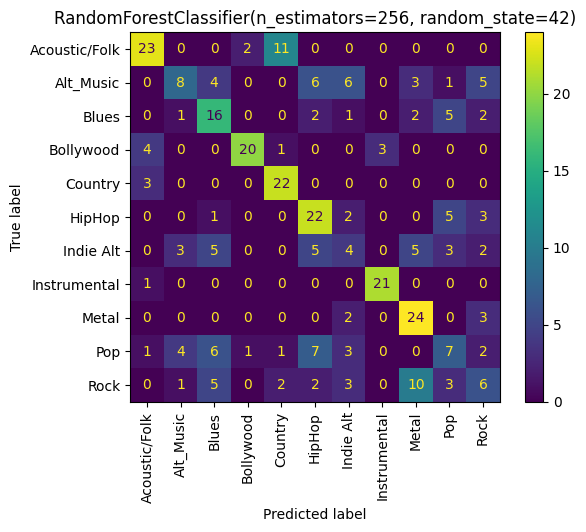

In [44]:
cm(y_test, rf_model)

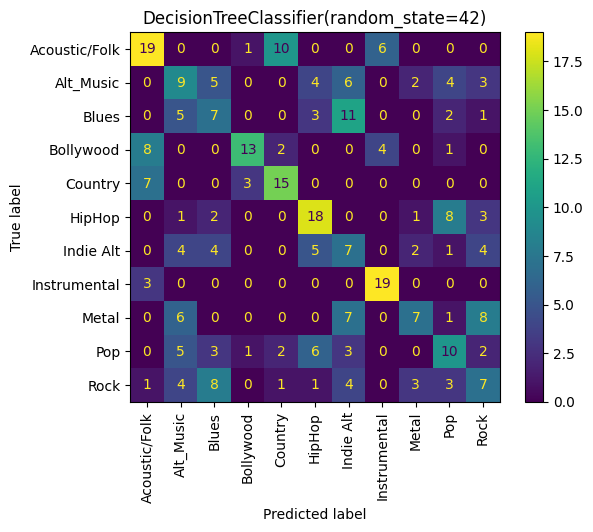

In [45]:
cm(y_test, dtc_model)

11/11 [==============================] - 0s 427us/step


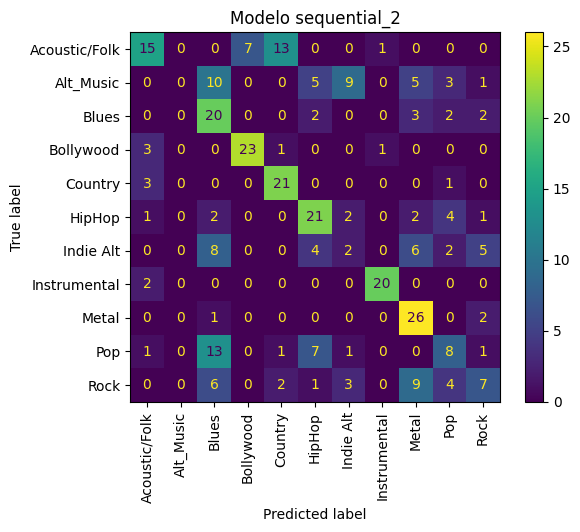

In [46]:
cm_bloques(y_test_t, model_block)

11/11 [==============================] - 0s 3ms/step


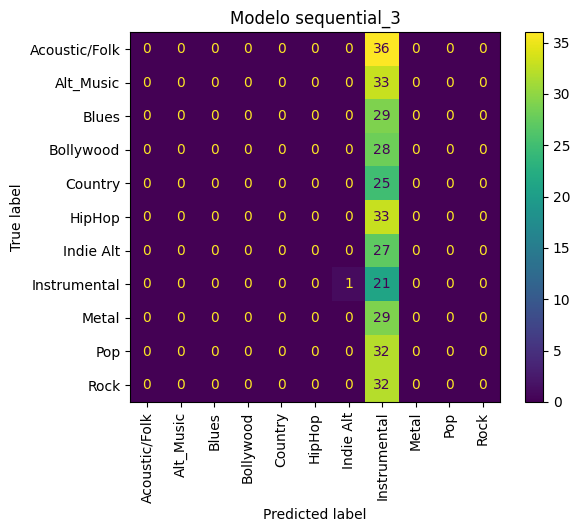

In [47]:
cm_bloques(y_test_t, model_lstm)

In [ ]:
#guarad el model fit
pickle.dump(model_fit, open('model_fit.pkl', 'wb'))
pickle.dump(model_lstm_fit, open('model_lstm_fit.pkl', 'wb'))

#lee el modelo
model_fit = pickle.load(open('model_fit.pkl', 'rb'))
model_lstm_fit = pickle.load(open('model_lstm_fit.pkl', 'rb'))

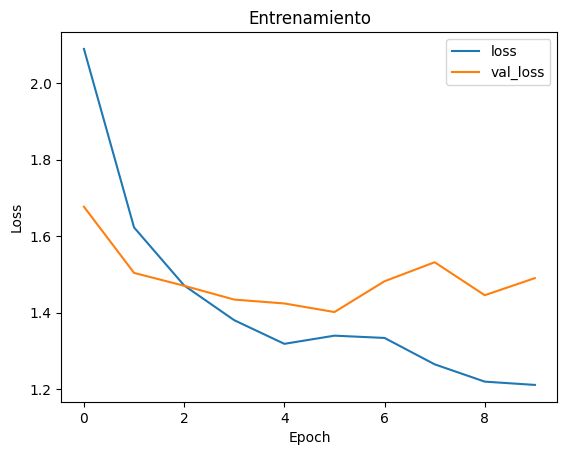

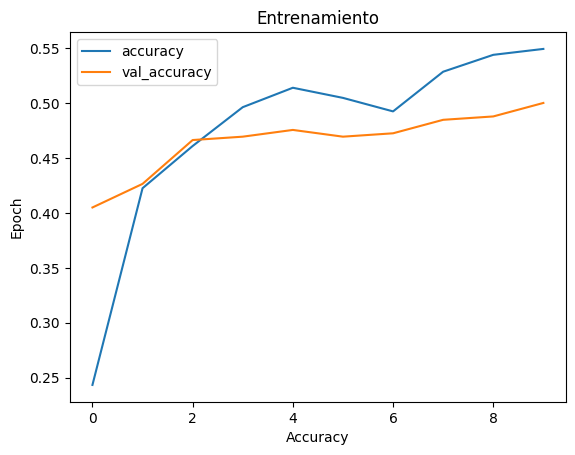

In [48]:
graficos(model_fit)

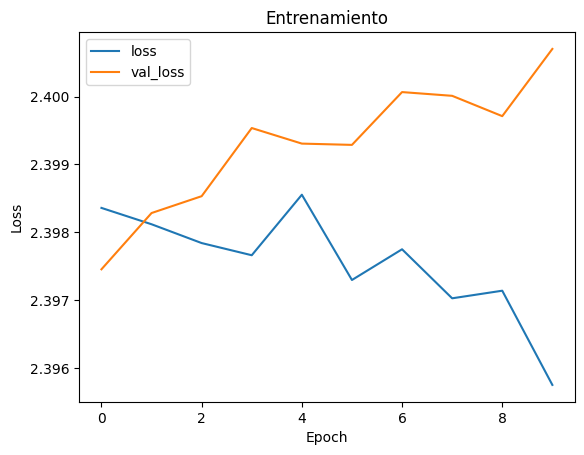

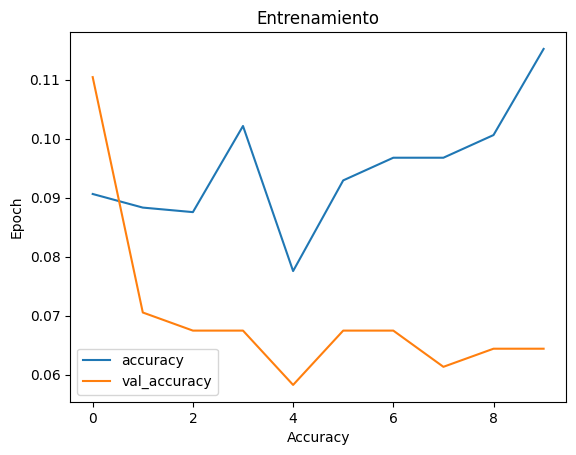

In [49]:
graficos(model_lstm_fit)